# 最大クリーク(Maximum Clique)問題と最大安定集合(Maximum Stable Set)問題

## 定義

- **クリーク**: 無向グラフの頂点集合の部分集合で，誘導部分グラフが完全グラフになるもの
- **安定集合**: 無向グラフの頂点集合の部分集合で，それに含まれるどの頂点間にも辺が存在しないもの (=クリークの反対)．独立集合 (Independent Set) とも

**最大クリーク問題**: 無向グラフが与えられたとき，そのクリークで最大のものを求めよ

**最大独立集合問題**: 無向グラフが与えられたとき，その安定集合で最大のものを求めよ

これら二つの問題は，補グラフ (辺の有無を入れ替えたグラフ) を考えると等価な問題である．

## モデル化

入力: 無向グラフ $G=(V,E)$

\begin{align*}
&\mathrm{maximize\ } &&\sum_{i\in V} x_i \\
&\mathrm{subject\ to\ } && x_i + x_j \le 1 \quad \forall (i,j) \in E \\
& && x_i \in \{0,1\} \quad \forall i \in V
\end{align*}

# 極大クリークの列挙

- [networkx.find_cliques](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.find_cliques.html)

- [Graphillion.GraphSet.cliques](https://github.com/takemaru/graphillion/blob/master/graphillion/graphset.py#L2009)
    - クリークのサイズを指定して呼び出すが，テキストにある通り遅い


In [1]:
import networkx as nx

G = nx.fast_gnp_random_graph(100, 0.5, seed=1)
count = 0
for i in nx.find_cliques(G):
    count += 1
count

15554

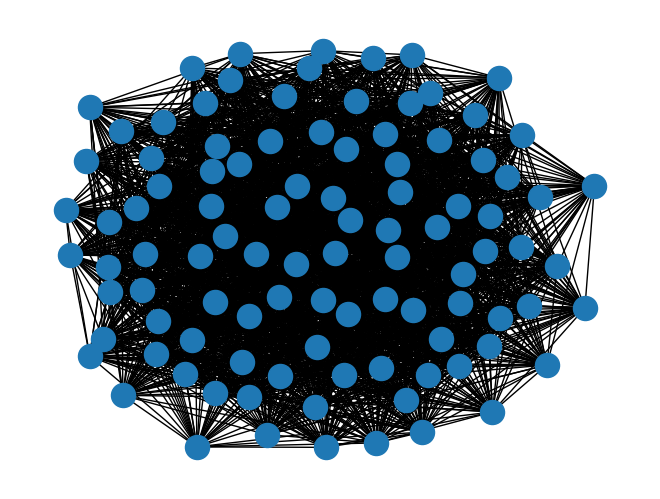

In [2]:
nx.draw(G)

In [3]:
count = 0
for i in nx.find_cliques(G):
    print(i)
    count += 1
    if count >= 10:
        break

[0, 8, 32, 40, 91]
[0, 8, 32, 17, 91, 67]
[0, 8, 32, 17, 94]
[0, 8, 32, 17, 79]
[0, 8, 67, 88, 44]
[0, 8, 67, 88, 87]
[0, 8, 67, 91, 44]
[0, 8, 67, 91, 71]
[0, 8, 67, 30, 71]
[0, 8, 67, 87, 17]


In [4]:
import time
from graphillion import GraphSet, Universe

# 頂点数 100 では全く終わらないので小さくする
G_small = nx.fast_gnp_random_graph(20, 0.5)
Universe.set_universe(G_small.edges)

t_s = time.time()
cliques = GraphSet.cliques(3)
t_e = time.time()
print('Time:', t_e - t_s)

cliques

Time: 2.9143590927124023


GraphSet([[(1, 4), (1, 11), (4, 11)], [(1, 4), (1, 15), (4, 15)], [(0, 2), ( ...

# 近似解法

- [networkx.approximation.max_clique](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.clique.max_clique.html)

In [5]:
import random
from networkx.algorithms import approximation

n = 500
random.seed(1)
pos = {i: (random.random(), random.random()) for i in range(n)}
G = nx.random_geometric_graph(n, 0.3, pos=pos, seed=1)

t_s = time.time()
S = approximation.max_clique(G)
t_e = time.time()
print(len(S))
print(S)
print('Time:', t_e - t_s)

47
{384, 1, 259, 132, 261, 5, 137, 11, 403, 23, 280, 154, 157, 286, 29, 422, 40, 298, 170, 428, 432, 48, 306, 184, 313, 191, 63, 451, 68, 326, 328, 205, 462, 463, 464, 80, 88, 94, 224, 225, 106, 363, 492, 113, 372, 122, 126}
Time: 4.62056303024292


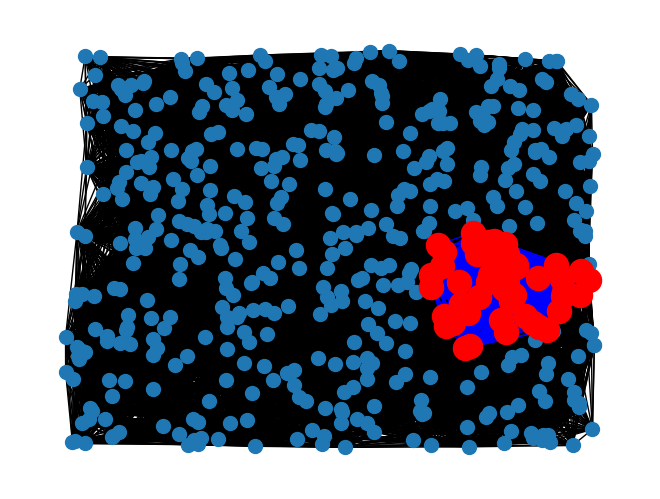

In [6]:
nx.draw(G, pos=pos, node_size=100)
nx.draw(
    G,
    pos=pos,
    nodelist=list(S),
    edgelist=[(i, j) for i in S for j in S if i < j],
    node_color="red",
    edge_color="blue",
)

10
{353, 419, 131, 165, 4, 10, 13, 367, 21, 30}


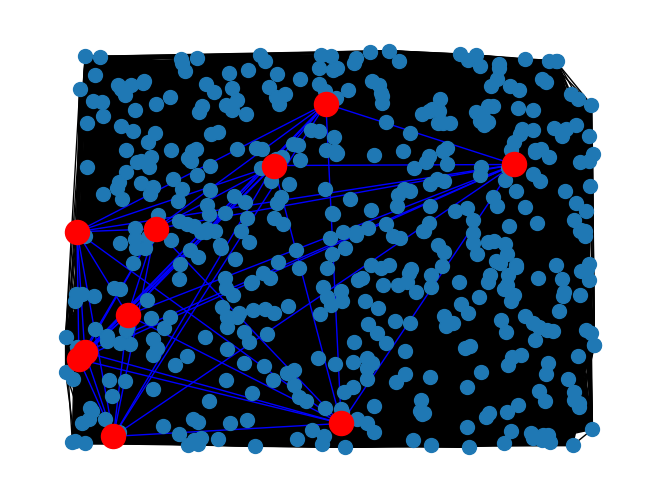

In [7]:
# 上で最初に扱ったグラフでも実験
n = 500
G = nx.fast_gnp_random_graph(n, 0.5, seed=1)
S = approximation.max_clique(G)
print(len(S))
print(S)
nx.draw(G, pos=pos, node_size=100)
nx.draw(
    G,
    pos=pos,
    nodelist=list(S),
    edgelist=[(i, j) for i in S for j in S if i < j],
    node_color="red",
    edge_color="blue",
)

## タブーサーチ

- あとで工夫を加える
- 以下に実装が落ちていた: https://www.dcc.fc.up.pt/~jpp/code/py_metaheur/ssp_ts.py
- 最大安定集合問題のソルバとして実装されているので、補グラフに適用する

In [8]:
from tabu_search import construct, tabu_search, ts_intens_divers, hybrid

In [9]:
def make_adj(nodes, edges) -> dict:
    adj = {
        v: set() for v in nodes
    }
    for u, v in edges:
        adj[u].add(v)
        adj[v].add(u)
    return adj

iter: 0 	card: 8 (0 conflicts) 	best: 8
iter: 1 	card: 9 (1 conflicts) 	best: 8
iter: 2 	card: 8 (0 conflicts) 	best: 8
iter: 3 	card: 9 (1 conflicts) 	best: 8
iter: 4 	card: 8 (0 conflicts) 	best: 8
iter: 5 	card: 9 (1 conflicts) 	best: 8
iter: 6 	card: 8 (0 conflicts) 	best: 8
iter: 7 	card: 9 (0 conflicts) 	best: 9
iter: 8 	card: 10 (1 conflicts) 	best: 9
iter: 9 	card: 9 (0 conflicts) 	best: 9
iter: 10 	card: 10 (1 conflicts) 	best: 9
iter: 11 	card: 9 (0 conflicts) 	best: 9
iter: 12 	card: 10 (0 conflicts) 	best: 10
iter: 13 	card: 11 (1 conflicts) 	best: 10
iter: 14 	card: 10 (0 conflicts) 	best: 10
iter: 15 	card: 11 (1 conflicts) 	best: 10
iter: 16 	card: 10 (0 conflicts) 	best: 10
iter: 17 	card: 11 (1 conflicts) 	best: 10
iter: 18 	card: 10 (0 conflicts) 	best: 10
iter: 19 	card: 11 (1 conflicts) 	best: 10
iter: 20 	card: 10 (0 conflicts) 	best: 10
iter: 21 	card: 11 (2 conflicts) 	best: 10
iter: 22 	card: 10 (1 conflicts) 	best: 10
iter: 23 	card: 9 (0 conflicts) 	best: 10
i

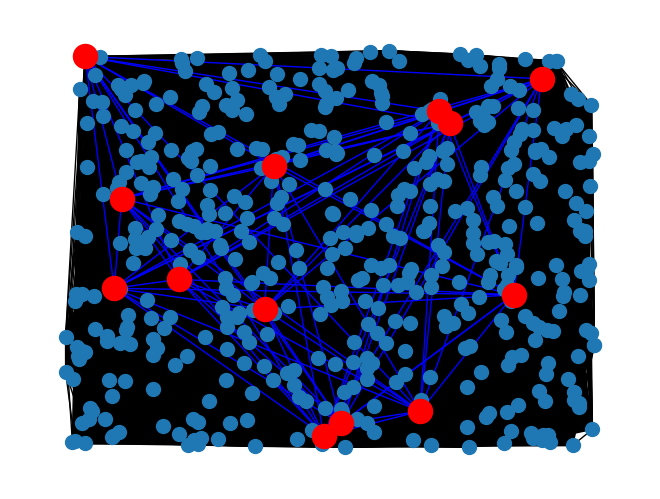

In [10]:
n = 500
G = nx.fast_gnp_random_graph(n, 0.5, seed=1)
Gbar = nx.complement(G)
nodes, edges = Gbar.nodes(), Gbar.edges()
adj = make_adj(nodes, edges)

sol = construct(nodes, adj)

max_iter = 10000
tabulen = len(nodes) / 10
t_s = time.time()
bestsol, bestcard = tabu_search(nodes, adj, sol, max_iter, tabulen)
t_e = time.time()

S = bestsol
nx.draw(G, pos=pos, node_size = 100)
nx.draw(
    G,
    pos=pos,
    nodelist=list(S),
    edgelist=[(i, j) for i in S for j in S if i < j],
    node_color="red",
    edge_color="blue",
)
print(len(bestsol))
print('Time:', t_e - t_s)

iter: 0 	card: 45 (0 conflicts) 	best: 45
iter: 1 	card: 46 (1 conflicts) 	best: 45
iter: 2 	card: 45 (0 conflicts) 	best: 45
iter: 3 	card: 46 (0 conflicts) 	best: 46
iter: 4 	card: 47 (3 conflicts) 	best: 46
iter: 5 	card: 46 (2 conflicts) 	best: 46
iter: 6 	card: 45 (1 conflicts) 	best: 46
iter: 7 	card: 44 (0 conflicts) 	best: 46
iter: 8 	card: 45 (1 conflicts) 	best: 46
iter: 9 	card: 44 (0 conflicts) 	best: 46
iter: 10 	card: 45 (2 conflicts) 	best: 46
iter: 11 	card: 44 (1 conflicts) 	best: 46
iter: 12 	card: 43 (0 conflicts) 	best: 46
iter: 13 	card: 44 (3 conflicts) 	best: 46
iter: 14 	card: 43 (2 conflicts) 	best: 46
iter: 15 	card: 42 (1 conflicts) 	best: 46
iter: 16 	card: 41 (1 conflicts) 	best: 46
iter: 17 	card: 40 (1 conflicts) 	best: 46
iter: 18 	card: 39 (0 conflicts) 	best: 46
iter: 19 	card: 40 (1 conflicts) 	best: 46
iter: 20 	card: 39 (1 conflicts) 	best: 46
iter: 21 	card: 38 (1 conflicts) 	best: 46
iter: 22 	card: 37 (0 conflicts) 	best: 46
iter: 23 	card: 38 (1

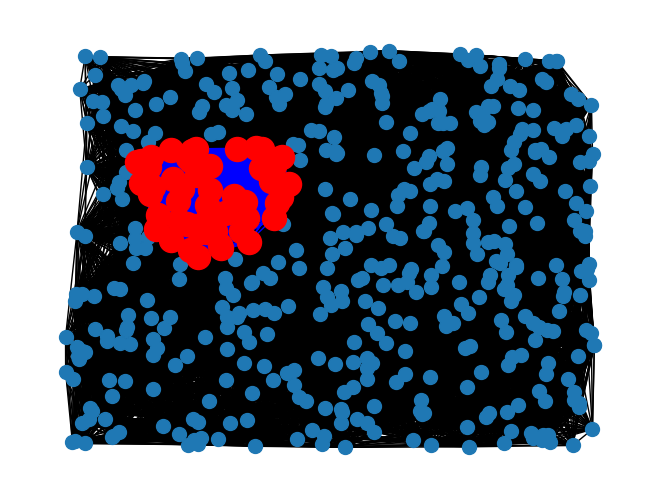

In [11]:
n = 500
random.seed(1)
pos = {i: (random.random(), random.random()) for i in range(n)}
G = nx.random_geometric_graph(n, 0.3, pos=pos, seed=1)

Gbar = nx.complement(G)
nodes, edges = Gbar.nodes(), Gbar.edges()
adj = make_adj(nodes, edges)

sol = construct(nodes, adj)

max_iter = 10000
tabulen = len(nodes) / 10
t_s = time.time()
bestsol, bestcard = tabu_search(nodes, adj, sol, max_iter, tabulen)
t_e = time.time()

S = bestsol
nx.draw(G, pos=pos, node_size = 100)
nx.draw(
    G,
    pos=pos,
    nodelist=list(S),
    edgelist=[(i, j) for i in S for j in S if i < j],
    node_color="red",
    edge_color="blue",
)
print(len(bestsol))
print('Time:', t_e - t_s)


# 集中化・多様化を入れたタブーサーチ

iter: 0 	non-improved: 0/1 	card: 8 (0 conflicts) 	best: 8
iter: 1 	non-improved: 0/1 	card: 9 (1 conflicts) 	best: 8
iter: 2 	non-improved: 1/1 	card: 8 (0 conflicts) 	best: 8
*** diversifying: constructing maximal clique forom less used vertex ***
iter: 3 	non-improved: 0/2 	card: 11 (1 conflicts) 	best: 10
iter: 4 	non-improved: 1/2 	card: 10 (0 conflicts) 	best: 10
iter: 5 	non-improved: 2/2 	card: 11 (2 conflicts) 	best: 10
*** intensifying: switching to best found solution ***
iter: 6 	non-improved: 0/3 	card: 11 (1 conflicts) 	best: 10
iter: 7 	non-improved: 1/3 	card: 10 (1 conflicts) 	best: 10
iter: 8 	non-improved: 2/3 	card: 9 (1 conflicts) 	best: 10
iter: 9 	non-improved: 3/3 	card: 8 (1 conflicts) 	best: 10
*** diversifying: constructing maximal clique forom less used vertex ***
iter: 10 	non-improved: 0/4 	card: 9 (1 conflicts) 	best: 10
iter: 11 	non-improved: 1/4 	card: 8 (0 conflicts) 	best: 10
iter: 12 	non-improved: 2/4 	card: 9 (0 conflicts) 	best: 10
iter: 13 	non-

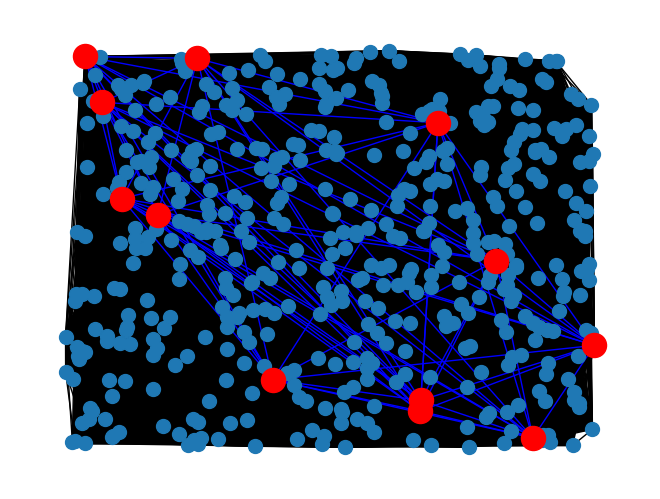

In [12]:
n = 500
G = nx.fast_gnp_random_graph(n, 0.5, seed=1)
Gbar = nx.complement(G)
nodes, edges = Gbar.nodes(), Gbar.edges()
adj = make_adj(nodes, edges)

sol = construct(nodes, adj)

max_iter = 10000
tabulen = len(nodes) / 10
t_s = time.time()
bestsol, bestcard = ts_intens_divers(nodes, adj, sol, max_iter, tabulen)
t_e = time.time()

S = bestsol
nx.draw(G, pos=pos, node_size = 100)
nx.draw(
    G,
    pos=pos,
    nodelist=list(S),
    edgelist=[(i, j) for i in S for j in S if i < j],
    node_color="red",
    edge_color="blue",
)
print(len(bestsol))
print('Time:', t_e - t_s)

iter: 0 	non-improved: 0/1 	card: 45 (0 conflicts) 	best: 45
iter: 1 	non-improved: 0/1 	card: 46 (1 conflicts) 	best: 45
iter: 2 	non-improved: 1/1 	card: 45 (0 conflicts) 	best: 45
*** diversifying: constructing maximal clique forom less used vertex ***
iter: 3 	non-improved: 0/2 	card: 48 (1 conflicts) 	best: 47
iter: 4 	non-improved: 1/2 	card: 47 (0 conflicts) 	best: 47
iter: 5 	non-improved: 2/2 	card: 48 (1 conflicts) 	best: 47
*** intensifying: switching to best found solution ***
iter: 6 	non-improved: 0/3 	card: 48 (1 conflicts) 	best: 47
iter: 7 	non-improved: 1/3 	card: 47 (1 conflicts) 	best: 47
iter: 8 	non-improved: 2/3 	card: 46 (1 conflicts) 	best: 47
iter: 9 	non-improved: 3/3 	card: 45 (1 conflicts) 	best: 47
*** diversifying: constructing maximal clique forom less used vertex ***
iter: 10 	non-improved: 0/4 	card: 47 (1 conflicts) 	best: 47
iter: 11 	non-improved: 1/4 	card: 46 (0 conflicts) 	best: 47
iter: 12 	non-improved: 2/4 	card: 47 (1 conflicts) 	best: 47
ite

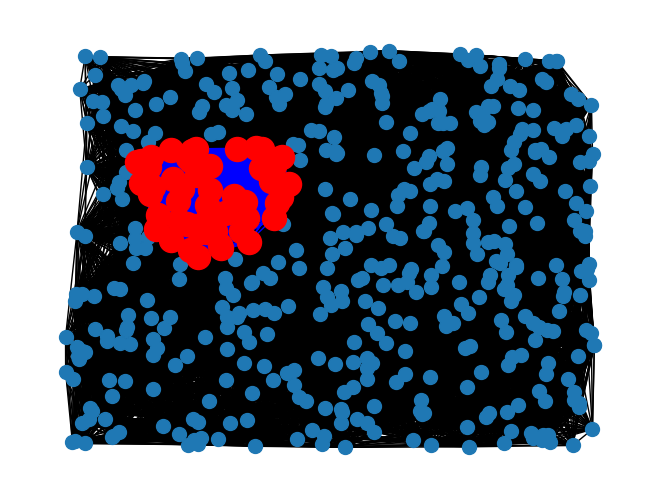

In [13]:
n = 500
random.seed(1)
pos = {i: (random.random(), random.random()) for i in range(n)}
G = nx.random_geometric_graph(n, 0.3, pos=pos, seed=1)

Gbar = nx.complement(G)
nodes, edges = Gbar.nodes(), Gbar.edges()
adj = make_adj(nodes, edges)

sol = construct(nodes, adj)

max_iter = 10000
tabulen = len(nodes) / 10
t_s = time.time()
bestsol, bestcard = ts_intens_divers(nodes, adj, sol, max_iter, tabulen)
t_e = time.time()

S = bestsol
nx.draw(G, pos=pos, node_size = 100)
nx.draw(
    G,
    pos=pos,
    nodelist=list(S),
    edgelist=[(i, j) for i in S for j in S if i < j],
    node_color="red",
    edge_color="blue",
)
print(len(bestsol))
print('Time:', t_e - t_s)

# 平坦探索法

- この問題では同じ目的関数値をとる組み合わせが大量にあるので，これを抜け出す工夫を施す．

New plateau search
expanding... 9
plateau phase... 9
		iter:23	9/9
expanding... 10
plateau phase... 10
		iter:30	10/10
expanding... 11
plateau phase... 11
		iter:35	11/11
expanding... 12
plateau phase... 12
		iter:86	12/12
New plateau search
New plateau search
expanding... 10
plateau phase... 10
		iter:116	10/12
expanding... 11
plateau phase... 11
		iter:167	11/12
New plateau search
New plateau search
expanding... 9
plateau phase... 9
		iter:183	9/12
expanding... 10
plateau phase... 10
		iter:206	10/12
expanding... 11
plateau phase... 11
		iter:207	11/12
New plateau search
expanding... 9
plateau phase... 9
		iter:241	9/12
expanding... 10
plateau phase... 10
		iter:246	10/12
expanding... 11
plateau phase... 11
		iter:247	11/12
New plateau search
expanding... 9
plateau phase... 9
		iter:271	9/12
expanding... 10
plateau phase... 10
		iter:282	10/12
expanding... 11
plateau phase... 11
		iter:333	11/12
New plateau search
expanding... 9
plateau phase... 9
		iter:343	9/12
expanding... 11
plat

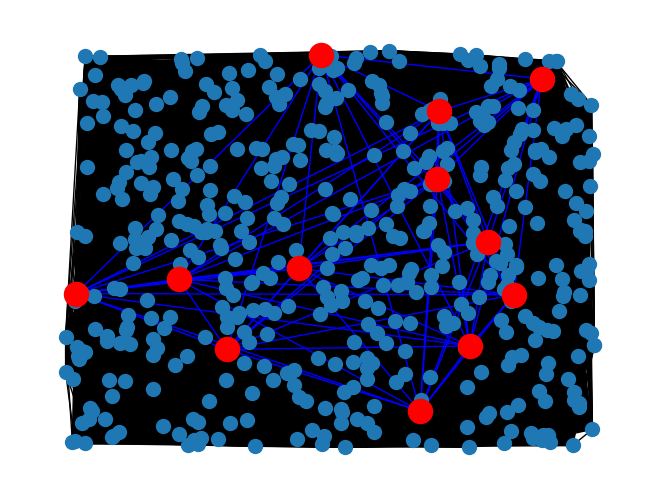

In [14]:
n = 500
G = nx.fast_gnp_random_graph(n, 0.5, seed=1)
Gbar = nx.complement(G)
nodes, edges = Gbar.nodes(), Gbar.edges()
adj = make_adj(nodes, edges)

max_iter = 10000
tabulen = len(nodes) / 10
t_s = time.time()
bestsol, bestrmn, bestcard = hybrid(nodes, adj, max_iter, tabulen)
t_e = time.time()

S = bestsol
nx.draw(G, pos=pos, node_size = 100)
nx.draw(
    G,
    pos=pos,
    nodelist=list(S),
    edgelist=[(i, j) for i in S for j in S if i < j],
    node_color="red",
    edge_color="blue",
)
print(len(bestsol))
print('Time:', t_e - t_s)

New plateau search
expanding... 42
plateau phase... 42
		iter:50	42/42
expanding... 44
plateau phase... 44
		iter:102	44/44
New plateau search
expanding... 45
plateau phase... 45
		iter:161	45/45
expanding... 50
plateau phase... 50
		iter:168	50/50
expanding... 51
plateau phase... 51
		iter:171	51/51
expanding... 52
plateau phase... 52
		iter:222	52/52
New plateau search
New plateau search
expanding... 38
plateau phase... 38
		iter:316	38/52
expanding... 39
plateau phase... 39
		iter:319	39/52
expanding... 40
plateau phase... 40
		iter:322	40/52
expanding... 41
plateau phase... 41
		iter:325	41/52
expanding... 42
plateau phase... 42
		iter:334	42/52
expanding... 43
plateau phase... 43
		iter:385	43/52
New plateau search
expanding... 29
plateau phase... 29
		iter:459	29/52
expanding... 31
plateau phase... 31
		iter:511	31/52
New plateau search
expanding... 29
plateau phase... 29
		iter:537	29/52
expanding... 30
plateau phase... 30
		iter:540	30/52
expanding... 31
plateau phase... 31
		i

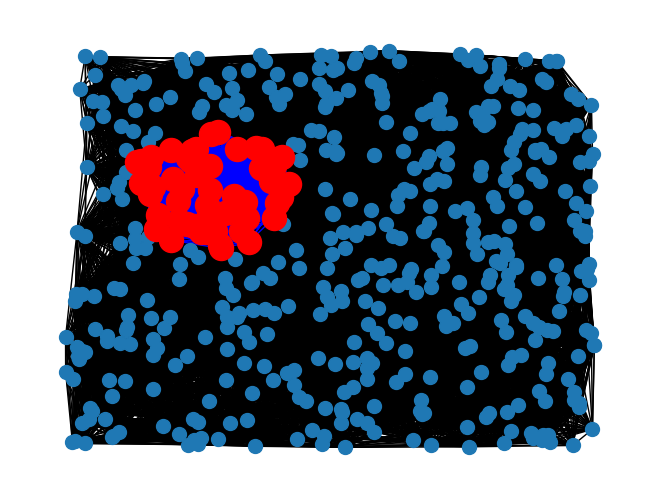

In [15]:
n = 500
random.seed(1)
pos = {i: (random.random(), random.random()) for i in range(n)}
G = nx.random_geometric_graph(n, 0.3, pos=pos, seed=1)

Gbar = nx.complement(G)
nodes, edges = Gbar.nodes(), Gbar.edges()
adj = make_adj(nodes, edges)

max_iter = 10000
tabulen = len(nodes) / 10
t_s = time.time()
bestsol, bestrmn, bestcard = hybrid(nodes, adj, max_iter, tabulen)
t_e = time.time()

S = bestsol
nx.draw(G, pos=pos, node_size = 100)
nx.draw(
    G,
    pos=pos,
    nodelist=bestsol,
    edgelist=[(i, j) for i in S for j in S if i < j],
    node_color="red",
    edge_color="blue",
)
print(len(bestsol))
print('Time:', t_e - t_s)

## 動的計画での定式化

[discrete-optimization](https://github.com/airbus/discrete-optimization/blob/master/discrete_optimization/maximum_independent_set/solvers/dp.py)

- state: $S \subset V$ with objective $ f(S) = |S|$
- target: 追加できる頂点の集合 $ O = V $
- transition: For $i \in O$,
    - $ S \to S \cup \{i \}$
    - $ f(S) \to f(S) + 1 $
    - $ O \to O \setminus (\{i\} \cup N(i))$ ($N(i)$: $i$ の隣接集合))
    - base case: $O=\emptyset$

気になる点
- Force transition とか定義できるか？

Solver: LNBS from DIDPPy v0.9.0
Searched with beam size: 1, expanded: 383, elapsed time: 0.001269
New primal bound: 9, expanded: 383, elapsed time: 0.001283916
A new primal bound is found with depth: 383, #beam: 4
New primal bound: 10, expanded: 3495, elapsed time: 0.012055209
A new primal bound is found with depth: 4, #beam: 8
New primal bound: 11, expanded: 59004, elapsed time: 0.349013668
A new primal bound is found with depth: 8, #beam: 64
New primal bound: 12, expanded: 1142271, elapsed time: 5.049835209
12
Time: 30.03658413887024


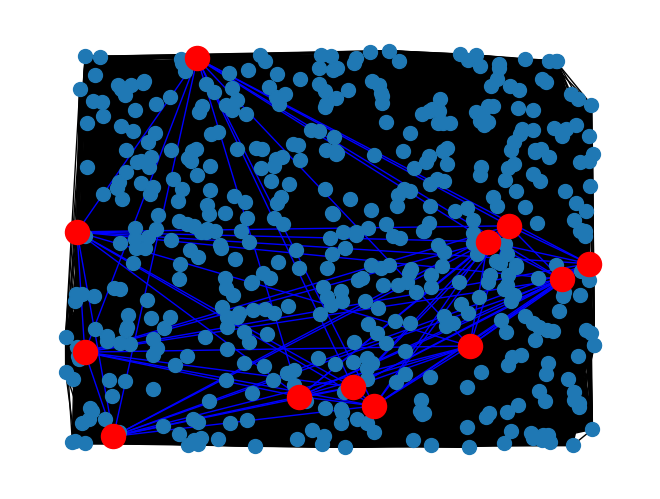

In [16]:
from discrete_optimization.maximum_independent_set.problem import MisProblem
from discrete_optimization.maximum_independent_set.solvers.dp import DpMisSolver, dp

n = 500
G = nx.fast_gnp_random_graph(n, 0.5, seed=1)
Gbar = nx.complement(G)

problem = MisProblem(Gbar)
solver = DpMisSolver(problem=problem)

t_s = time.time()
result = solver.solve(solver=dp.LNBS, time_limit=30, quiet=False)
sol, fit = result.get_best_solution_fit()
t_e = time.time()

nx.draw(G, pos=pos, node_size = 100)
S = [i for i in range(n) if sol.chosen[i]==1]
nx.draw(
    G,
    pos=pos,
    nodelist=S,
    edgelist=[(i, j) for i in S for j in S if i < j],
    node_color="red",
    edge_color="blue",
)
print(fit)
print('Time:', t_e - t_s)

Solver: LNBS from DIDPPy v0.9.0
Searched with beam size: 1, expanded: 500, elapsed time: 0.000395292
New primal bound: 46, expanded: 500, elapsed time: 0.000401667
A new primal bound is found with depth: 500, #beam: 4
New primal bound: 48, expanded: 6526, elapsed time: 0.01790979
A new primal bound is found with depth: 493, #beam: 4
New primal bound: 49, expanded: 14896, elapsed time: 0.034601415
A new primal bound is found with depth: 4, #beam: 256
New primal bound: 51, expanded: 1212015, elapsed time: 2.104563541
A new primal bound is found with depth: 481, #beam: 1024
New primal bound: 52, expanded: 2391675, elapsed time: 3.977804958
52
Time: 30.13741898536682


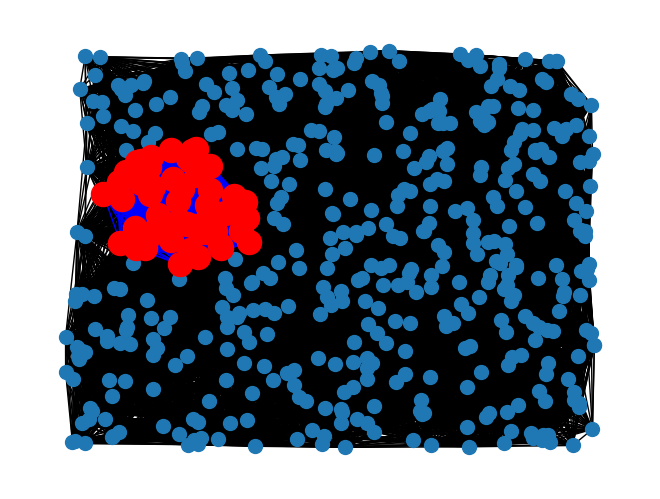

In [17]:
n = 500
random.seed(1)
pos = {i: (random.random(), random.random()) for i in range(n)}
G = nx.random_geometric_graph(n, 0.3, pos=pos, seed=1)
Gbar = nx.complement(G)

problem = MisProblem(Gbar)
solver = DpMisSolver(problem=problem)

t_s = time.time()
result = solver.solve(solver=dp.LNBS, time_limit=30, quiet=False)
sol, fit = result.get_best_solution_fit()
t_e = time.time()

nx.draw(G, pos=pos, node_size = 100)
S = [i for i in range(n) if sol.chosen[i]==1]
nx.draw(
    G,
    pos=pos,
    nodelist=S,
    edgelist=[(i, j) for i in S for j in S if i < j],
    node_color="red",
    edge_color="blue",
)
print(fit)
print('Time:', t_e - t_s)


DIDP で解くのは時間はかかるが、ある程度時間をかければ思考停止でそれなりに良い解が出ていて良さそう